In [43]:
# Importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


import pickle

%matplotlib inline 
#So plots display in the jupyter notebook environment

avos1_df = pd.read_csv('avos1.csv', sep='"' and',', index_col = 'Current Year Week Ending')


In [33]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 1.1 MB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 29.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 25.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 29.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [35]:
import geopandas

In [37]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 125 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 1.8 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
avos1_df.head(15)

,Geography,Timeframe,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
Current Year Week Ending,,,,,,,,,,,,
2023-01-29 00:00:00,Albany,Weekly,Conventional,1.061986,118903.56,20652.13,69264.38,20.83,21055.11,NaN,NaN,NaN
2023-01-22 00:00:00,Albany,Weekly,Conventional,1.087200,145606.29,31914.51,85603.85,15.28,20087.96,NaN,NaN,NaN
2023-01-15 00:00:00,Albany,Weekly,Conventional,1.064087,124806.13,22887.57,71058.74,19.21,22717.32,NaN,NaN,NaN
2023-01-09 00:00:00,Albany,Weekly,Conventional,1.096477,123185.36,22058.54,76314.33,25.01,21389.38,NaN,NaN,NaN
2023-01-29 00:00:00,Atlanta,Weekly,Conventional,0.913555,870655.04,357694.86,23480.73,84.05,99006.04,NaN,NaN,NaN
2023-01-22 00:00:00,Atlanta,Weekly,Conventional,0.945302,825696.78,348170.41,27964.20,113.68,84212.84,NaN,NaN,NaN
2023-01-15 00:00:00,Atlanta,Weekly,Conventional,0.924185,807455.47,352523.78,27575.65,137.14,85555.04,NaN,NaN,NaN
2023-01-09 00:00:00,Atlanta,Weekly,Conventional,0.933794,769668.12,330488.26,44473.04,134.34,86145.08,NaN,NaN,NaN
2023-01-29 00:00:00,Baltimore/Washington,Weekly,Conventional,1.143148,1012144.44,175187.49,419073.10,1627.37,335717.59,NaN,NaN,NaN


TOO MUCH DATA - for attempt to make geo mapwith av prices per region

Get rid of some columns from df:

In [51]:
columns_to_drop = ['4046 Units', '4225 Units', '4770 Units', 'Total Bulk and Bags Units','TotalBagged Units', 'SmlBagged Units', 'LrgBagged Units', 'X-LrgBagged Units']

avos1_df = avos1_df.drop(columns_to_drop, axis=1)
display(avos1_df.head())

,Geography,Timeframe,Type,ASP Current Year
Current Year Week Ending,,,,
2023-01-29 00:00:00,Albany,Weekly,Conventional,1.061986
2023-01-22 00:00:00,Albany,Weekly,Conventional,1.087200
2023-01-15 00:00:00,Albany,Weekly,Conventional,1.064087
2023-01-09 00:00:00,Albany,Weekly,Conventional,1.096477
2023-01-29 00:00:00,Atlanta,Weekly,Conventional,0.913555


explore data:

In [53]:
#unique geopgrpahy
geography = avos1_df.Geography.unique()

print(geography)


['Albany' 'Atlanta' 'Baltimore/Washington' 'Birmingham/Montgomery' 'Boise'
 'Boston' 'Buffalo/Rochester' 'Charlotte' 'Chicago' 'Cincinnati/Dayton'
 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville'
 'Miami/Ft. Lauderdale' 'Nashville' 'Northern New England'
 'New Orleans/Mobile' 'New York' 'Orlando' 'Peoria/Springfield'
 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Portland' 'Providence'
 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'Spokane'
 'St. Louis' 'Syracuse' 'Tampa' 'Toledo' 'West Tex/New Mexico' 'Wichita'
 'California' 'Great Lakes' 'Midsouth' 'Northeast' 'Plains'
 'South Central' 'Southeast' 'West' 'Total U.S.'
 "Source: IRI confidential information. HAB's calculation based in part on data reported by Information Resources, Inc. for the avocado category for Multi-Ou

In [55]:
avos1_df.describe() #get an idea of price range

,ASP Current Year
count,4248.000000
mean,1.328682
std,0.346820
min,0.680492
25%,1.054868
50%,1.271991
75%,1.574943
max,2.764590


<AxesSubplot:ylabel='Frequency'>

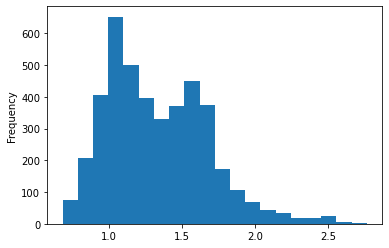

In [57]:
#visualise price spread
avos1_df['ASP Current Year'].plot(kind='hist', bins=20)

In [ ]:
#there's a lot of values for each region since it is weekly data, see how many:


In [59]:
avos1_df['Geography'].value_counts().head()


Albany        72
Atlanta       72
Pittsburgh    72
Portland      72
Providence    72
Name: Geography, dtype: int64

Too granular/too much detail for a map/visualisation for each geo area.
Need to GROUP data for each geo area and get an average for those areas
Will put in a new data frame:

In [61]:
group_by_geo = avos1_df.groupby(by=['Geography'])
avos1_df_avg = group_by_geo.mean()




In [63]:
avos1_df_avg.head(20)

,ASP Current Year
Geography,
Albany,1.364689
Atlanta,1.268823
Baltimore/Washington,1.433007
Birmingham/Montgomery,1.097394
Boise,1.448683
Boston,1.474905
Buffalo/Rochester,1.358253
California,1.411928
Charlotte,1.340748


In [ ]:
# looks like average price per region in that year

Now have to geocode it so it can go on a map 

In [ ]:
pip install geopy

In [65]:
from shapely.geometry import Point, Polygon
from geopy.geocoders import Bing
from geopy.extra.rate_limiter import RateLimiter
#found documentation on GeoPy and Google for tools above (I could not get two other methods
#to work - ChatGPT suggested GeoPandas with a specific dataset, which I still
#believe could work, but I didn't get there! So this is my last try)

In [70]:
geolocator = Bing(api_key='AvazSyvOPwQAud_-Fb0I57v5WofDMPQtDGkQxQ87ahFUbtgcYkVj25G55UtJH6WH', timeout=30)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2) # This prevents overloading the API with requests, but adds time to the process

geo_dict = {}
for i in geography:
    location = geocode(i)
    if location is not None:
        geo_dict[i] = location

print(geo_dict)

RateLimiter caught an error, retrying (0/2 tries). Called with (*("Source: IRI confidential information. HAB's calculation based in part on data reported by Information Resources, Inc. for the avocado category for Multi-Outlet (MULO). The information is believed to be reliable at the time supplied by IRI but is neither all-inclusive nor guaranteed by IRI. Without limiting the generality of the foregoing, specific data points may vary considerably from other information sources.",), **{}).
Traceback (most recent call last):
  File "/home/4fd39ab8-f3e2-4903-adc9-e3fc08e1f355/.local/lib/python3.9/site-packages/geopy/geocoders/base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "/home/4fd39ab8-f3e2-4903-adc9-e3fc08e1f355/.local/lib/python3.9/site-packages/geopy/adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "/home/4fd39ab8-f3e2-4903-adc9-e3fc08e1f355/.local/lib

{'Albany': Location(Albany, NY, United States, (42.65172577, -73.75509644, 0.0)), 'Atlanta': Location(Atlanta, GA, United States, (33.7485466, -84.39150238, 0.0)), 'Baltimore/Washington': Location(MD, United States, (39.17526245, -76.67152405, 0.0)), 'Birmingham/Montgomery': Location(Birmingham Hwy, Montgomery, AL 36108, United States, (32.4019268, -86.40179775, 0.0)), 'Boise': Location(Boise, ID, United States, (43.61579132, -116.20157623, 0.0)), 'Boston': Location(Boston, MA, United States, (42.35899353, -71.0586319, 0.0)), 'Buffalo/Rochester': Location(Buffalo, NY, United States, (42.8876915, -78.87937164, 0.0)), 'Charlotte': Location(Charlotte, NC, United States, (35.2237854, -80.84114075, 0.0)), 'Chicago': Location(Chicago, IL, United States, (41.8832283, -87.63240051, 0.0)), 'Cincinnati/Dayton': Location(Cincinnati, OH, United States, (39.10369873, -84.51361084, 0.0)), 'Columbus': Location(Columbus, OH, United States, (39.96276093, -82.99629211, 0.0)), 'Dallas/Ft. Worth': Locatio

I read it's useful to save the new dictionary as a 'pickle' file in order to not repeatedly call the API but I am not clear how to do it so I will just try to work with it as is and create a new data frame from the geo_dict


In [75]:
new_geo_df=pd.DataFrame(geo_dict)

In [77]:
new_geo_df.head()

,Albany,Atlanta,Baltimore/Washington,Birmingham/Montgomery,Boise,Boston,Buffalo/Rochester,Charlotte,Chicago,Cincinnati/Dayton,...,West Tex/New Mexico,Wichita,California,Great Lakes,Northeast,Plains,South Central,Southeast,West,Total U.S.
0,"Albany, NY, United States","Atlanta, GA, United States","MD, United States","Birmingham Hwy, Montgomery, AL 36108, United S...","Boise, ID, United States","Boston, MA, United States","Buffalo, NY, United States","Charlotte, NC, United States","Chicago, IL, United States","Cincinnati, OH, United States",...,"NM, United States","Wichita, KS, United States","CA, United States",,"Northeastern United States, United States","Plains, NJ, United States","Central-South, Burkina Faso",United States,"West, TX, United States",United States
1,"(42.65172577, -73.75509644)","(33.7485466, -84.39150238)","(39.17526245, -76.67152405)","(32.4019268, -86.40179775)","(43.61579132, -116.20157623)","(42.35899353, -71.0586319)","(42.8876915, -78.87937164)","(35.2237854, -80.84114075)","(41.8832283, -87.63240051)","(39.10369873, -84.51361084)",...,"(34.42137146, -106.10839081)","(37.68602371, -97.33557129)","(37.25466919, -119.61727142)","(45.0, -84.0)","(42.0, -73.0)","(41.14038849, -74.70214844)","(11.66738415, -1.07239723)","(34.0, -85.0)","(31.80101395, -97.09004211)","(39.50357056, -99.01832581)"


It needs tidying to be transposed and then merging with the price data - learned that 'melt' changes the orientation horizontal to vertical

In [96]:
geo_df_melted = new_geo_df.iloc[1:2,:].melt()
geo_df_melted.columns = ['area', 'co-ordinates'] # give the columns names

geo_df_melted.head()

,area,co-ordinates
0,Albany,"(42.65172577, -73.75509644)"
1,Atlanta,"(33.7485466, -84.39150238)"
2,Baltimore/Washington,"(39.17526245, -76.67152405)"
3,Birmingham/Montgomery,"(32.4019268, -86.40179775)"
4,Boise,"(43.61579132, -116.20157623)"


wahoo! and to merge the df:


In [84]:
#check shape compatibility:
print(avos1_df_avg.shape)
print(geo_df_melted.shape)   

(60, 1)
(58, 2)


In [98]:
new_df = pd.merge(avos1_df_avg, geo_df_melted, left_on='Geography', right_on='area')
display(new_df.head())
#this should match column 'Geogrpahy from avos1_df_avg with 'area' on the melted_df

,ASP Current Year,area,co-ordinates
0,1.364689,Albany,"(42.65172577, -73.75509644)"
1,1.268823,Atlanta,"(33.7485466, -84.39150238)"
2,1.433007,Baltimore/Washington,"(39.17526245, -76.67152405)"
3,1.097394,Birmingham/Montgomery,"(32.4019268, -86.40179775)"
4,1.448683,Boise,"(43.61579132, -116.20157623)"


In [102]:
len(new_df)

58

I lost the bottom 2 rows (as expected from different length _ think there was some non-data written in last lines I didn't get rid of) but a spot check of prices pre-merge shows it is aligned

co-ords now need to be a lat and long column (separated)

In [108]:
new_df[['latitude', 'longitude']] = pd.DataFrame(new_df['co-ordinates'].tolist(), index=new_df.index)
new_df.head()

,ASP Current Year,area,co-ordinates,latitude,longitude
0,1.364689,Albany,"(42.65172577, -73.75509644)",42.651726,-73.755096
1,1.268823,Atlanta,"(33.7485466, -84.39150238)",33.748547,-84.391502
2,1.433007,Baltimore/Washington,"(39.17526245, -76.67152405)",39.175262,-76.671524
3,1.097394,Birmingham/Montgomery,"(32.4019268, -86.40179775)",32.401927,-86.401798
4,1.448683,Boise,"(43.61579132, -116.20157623)",43.615791,-116.201576


Now need a GEOPANDAS dataframe in order to create a map plot

In [113]:
avo_gdf = gpd.GeoDataFrame(
    new_df, geometry=gpd.points_from_xy(new_df.longitude, new_df.latitude))

avo_gdf.head()


,ASP Current Year,area,co-ordinates,latitude,longitude,geometry
0,1.364689,Albany,"(42.65172577, -73.75509644)",42.651726,-73.755096,POINT (-73.75510 42.65173)
1,1.268823,Atlanta,"(33.7485466, -84.39150238)",33.748547,-84.391502,POINT (-84.39150 33.74855)
2,1.433007,Baltimore/Washington,"(39.17526245, -76.67152405)",39.175262,-76.671524,POINT (-76.67152 39.17526)
3,1.097394,Birmingham/Montgomery,"(32.4019268, -86.40179775)",32.401927,-86.401798,POINT (-86.40180 32.40193)
4,1.448683,Boise,"(43.61579132, -116.20157623)",43.615791,-116.201576,POINT (-116.20158 43.61579)


the extra column "geometry" to create a point

import a map to plot these on. There are files from US census called "shape files" for mapping 


In [156]:
usa = gpd.read_file('us_state.shp')


<AxesSubplot:>

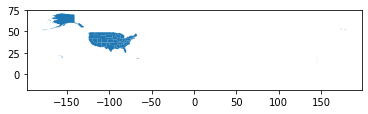

In [157]:
usa.plot()

a map base!!

In [1]:
#rmove some extra data of overseas territories ? see what's in the base map:
print(usa.head(10))


NameError: name 'usa' is not defined

<AxesSubplot:title={'center':'Avocado Prices by region in the United States'}>

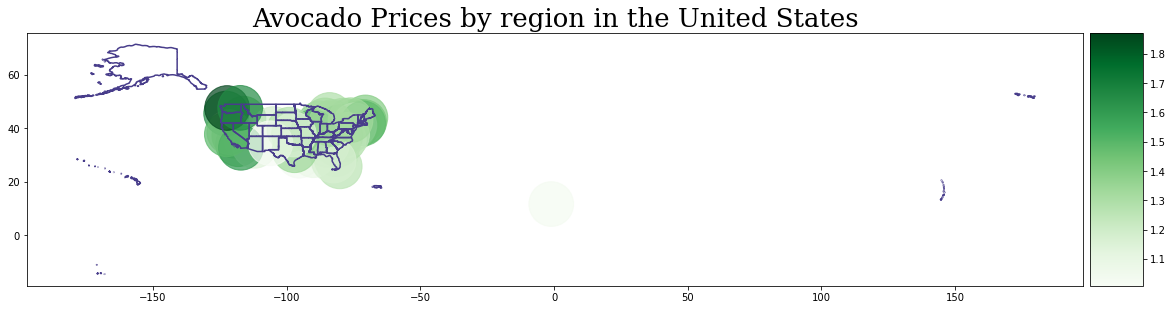

In [172]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # This is a function to make legend pretty

fig, ax = plt.subplots(figsize = (20,16)) 
plt.title('Avocado Prices by region in the United States', fontsize=26, fontfamily='serif')

#this part makes the legend the same size as  map, for prettiness
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

usa.boundary.plot(ax=ax, color='DarkSlateBlue') # using the boundary method here to get the outlines of the states for aesthetics
avo_gdf.plot(cmap='Greens', column='ASP Current Year', legend=True, ax=ax, s=2000, alpha=0.7, cax=cax)




In [ ]:
#need to figure out how to remove unused terriroties so it fits, and there is a random/non-mapped value to investigate. 